In [1]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import uuid
import tensorflow as tf

In [2]:
# pip install opencv-python==4.6.0.66

In [2]:
#importing tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten
import tensorflow as tf

In [3]:
#setting GPU growth
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.se_memory_growth(gpu,True)

In [4]:
# len(gpus)
gpus

[]

In [5]:
POS_PATH=os.path.join('data','positive')
NEG_PATH=os.path.join('data','negative')
ANC_PATH=os.path.join('data','anchor')

In [7]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [7]:
#uncompressing tar gz file
!tar -xf lfw.tgz

In [6]:
#move LFW images to the following repository data/negative
for directory in os.listdir('lfw'):  #looping in every single dir
    for file in os.listdir(os.path.join('lfw',directory)):   #looping in evry single file
        EX_PATH=os.path.join('lfw',directory,file) #
        NEW_PATH=os.path.join(NEG_PATH,file)
        os.replace(EX_PATH,NEW_PATH)

In [7]:
import uuid

In [14]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
#     # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
#     # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

(250, 250, 3)

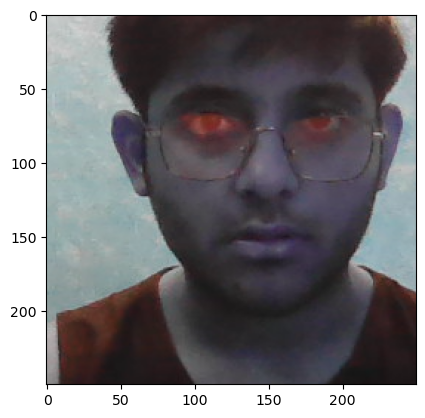

In [15]:
plt.imshow(frame)
frame.shape

In [16]:
anchor=tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive=tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative=tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [17]:
dir_test=anchor.as_numpy_iterator()

In [18]:
dir_test.next()

b'data\\anchor\\47b296e2-4a89-11ee-8de0-70cd0df6c3c6.jpg'

In [19]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1  
    img = img / 255.0
    
    # Return image
    return img

In [20]:
img=preprocess('data\\anchor\\5477104c-4973-11ee-9b8b-70cd0df6c3c6.jpg')

In [21]:
img.numpy().max() 

0.9970588

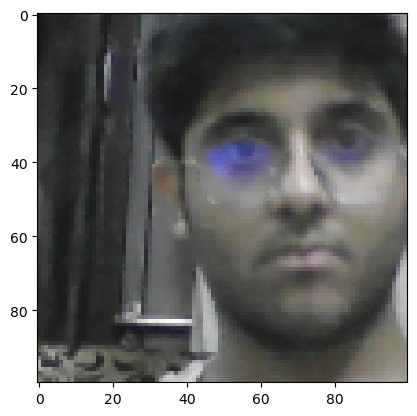

In [22]:
plt.imshow(img)

dataset.map(preprocess)
#creating labelled dataset

In [23]:
positives=tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives=tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data=positives.concatenate(negatives)

In [24]:
tf.ones(len(anchor))

<tf.Tensor: shape=(167,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [25]:
samples=data.as_numpy_iterator()

In [26]:
example=samples.next()

In [27]:
example

(b'data\\anchor\\452b5cf3-4a89-11ee-80f1-70cd0df6c3c6.jpg',
 b'data\\positive\\2477b076-4a89-11ee-986f-70cd0df6c3c6.jpg',
 1.0)

In [28]:
def preprocess_twin(input_img,validation_img,label):
    return(preprocess(input_img),preprocess(validation_img),label)

In [29]:
res=preprocess_twin(*example)

In [30]:
len(res)

3

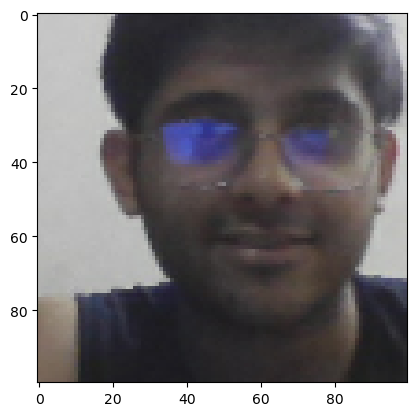

In [31]:
plt.imshow(res[1])

In [32]:
#build dataloader pipeline
data=data.map(preprocess_twin)
data=data.cache()
data=data.shuffle(buffer_size=1024)

In [33]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [34]:
# training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [35]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [36]:
#testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [37]:
inp=Input(shape=(100,100,3),name='input_image')

In [38]:
#first block
c1=Conv2D(64,(10,10),activation="relu")(inp)

In [39]:
m1=MaxPooling2D(64,(2,2),padding="same")(c1)

In [40]:
#second block
c2=Conv2D(128,(7,7),activation="relu")(m1)
m2=MaxPooling2D(64,(2,2),padding="same")(c2)

In [41]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [42]:
c4 = Conv2D(128, (4,4), activation='relu')(m3)
f1=Flatten()(c4)
d1=Dense(4096,activation="sigmoid")(f1)

In [43]:
mod=Model(inputs=[inp],outputs=[d1],name="embedding")

In [44]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [45]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [46]:
embedding = make_embedding()

In [47]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [48]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
        
    def call(self,input_embedding,validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)
    

In [49]:
l1=L1Dist()

In [50]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [53]:
distances = siamese_layer(inp_embedding, val_embedding)
classifier = Dense(1, activation='sigmoid')(distances)
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [52]:
siamese_layer = L1Dist()

In [54]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [55]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [56]:
#making siamese model
def make_siamese_model():
    input_image= Input(name='input_img',shape=(100,100,3))
    validation_image=Input(name='validation_img',shape=(100,100,3))
    
    siamese_layer=L1Dist()
    siamese_layer._name='distance'
    distances=siamese_layer(embedding(input_image),embedding(validation_image))
    
    classifier=Dense(1,activation='sigmoid')(distances)
    
    return Model(inputs=[input_image,validation_image],outputs=classifier,name='SiameseNetwork')

In [57]:
siamese_model=make_siamese_model()

In [58]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [59]:
binary_cross_loss=tf.losses.BinaryCrossentropy()

In [60]:
opt=tf.keras.optimizers.Adam(1e-4)

In [61]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(opt=opt,siamese_model=siamese_model)

In [62]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [63]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
X = batch_1[:2]
y = batch_1[2]
y

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [64]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [65]:
EPOCHS=20

In [67]:
train(train_data,EPOCHS)


 Epoch 1/20
12/12 [==============================] - 323s 27s/step

 Epoch 2/20
12/12 [==============================] - 298s 25s/step

 Epoch 3/20
12/12 [==============================] - 302s 25s/step

 Epoch 4/20
12/12 [==============================] - 290s 24s/step

 Epoch 5/20
12/12 [==============================] - 291s 24s/step

 Epoch 6/20
12/12 [==============================] - 295s 24s/step

 Epoch 7/20
12/12 [==============================] - 296s 25s/step

 Epoch 8/20
12/12 [==============================] - 295s 24s/step

 Epoch 9/20
12/12 [==============================] - 597s 51s/step

 Epoch 10/20
12/12 [==============================] - 625s 52s/step

 Epoch 11/20
12/12 [==============================] - 615s 51s/step

 Epoch 12/20
12/12 [==============================] - 344s 26s/step

 Epoch 13/20
12/12 [==============================] - 288s 24s/step

 Epoch 14/20
12/12 [==============================] - 288s 24s/step

 Epoch 15/20
12/12 [======================

In [68]:
#import metric calculations
from tensorflow.keras.metrics import Precision,Recall

In [69]:
test_input,test_val,y_true=test_data.as_numpy_iterator().next()

In [70]:
test_var=test_data.as_numpy_iterator().next()

In [71]:
len(test_var[1])

16

In [72]:
y_hat = siamese_model.predict([test_input, test_val])
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

1/1 [==============================] - 7s 7s/step


[1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

In [73]:
y_true

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [74]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [75]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [76]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 6s 6s/step
1.0 1.0


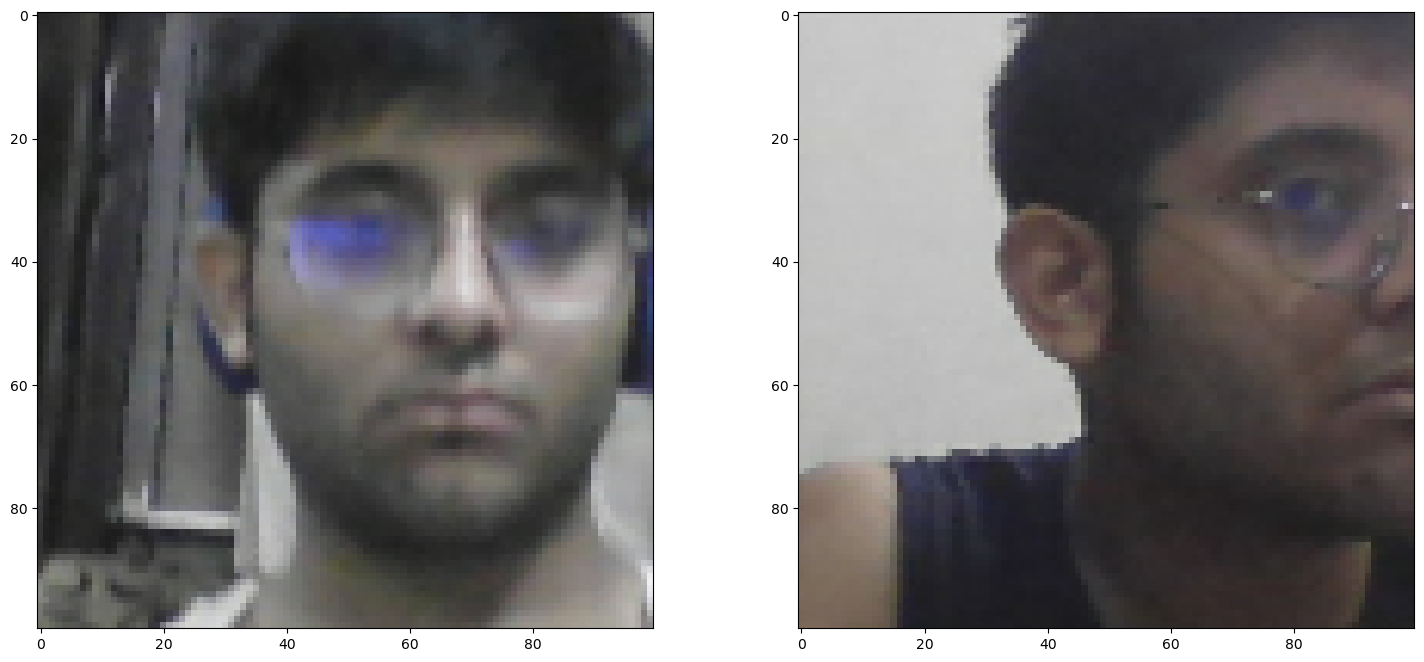

In [77]:
plt.figure(figsize=(18,8))

#set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[3])

#second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()

In [78]:
#saving model
siamese_model.save('siamesemodel.h5')

C:\Users\91989\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [79]:
#reloading model
model=tf.keras.models.load_model('siamesemodel.h5',custom_objects={'L1Dist':L1Dist,'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [80]:
tf.keras.models.load_model??

In [81]:
model.predict([test_input, test_val])

1/1 [==============================] - 6s 6s/step


array([[3.4362398e-07],
       [9.9996716e-01],
       [3.9079507e-07],
       [1.0000000e+00],
       [9.9996865e-01],
       [1.6369586e-07],
       [1.7599872e-05],
       [4.1183904e-07],
       [7.1898830e-07],
       [3.0727268e-05],
       [6.5691424e-06],
       [9.9890602e-01],
       [2.7896206e-07],
       [6.7534586e-07]], dtype=float32)

In [82]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [77]:
#building verification function
application_data\verification_images

SyntaxError: unexpected character after line continuation character (582567546.py, line 2)

In [83]:
os.listdir(os.path.join('application_data', 'verification_images'))

['003f9cdd-4a89-11ee-8d77-70cd0df6c3c6.jpg',
 '04c26522-4a89-11ee-8a57-70cd0df6c3c6.jpg',
 '05ab01e4-4a89-11ee-93b5-70cd0df6c3c6.jpg',
 '0ff30db0-4a89-11ee-9a18-70cd0df6c3c6.jpg',
 '10a33864-4a89-11ee-b863-70cd0df6c3c6.jpg',
 '10aa5963-4a89-11ee-b5ea-70cd0df6c3c6.jpg',
 '10b1b592-4a89-11ee-9c77-70cd0df6c3c6.jpg',
 '1ea7d448-4a89-11ee-b826-70cd0df6c3c6.jpg',
 '1eae983a-4a89-11ee-96da-70cd0df6c3c6.jpg',
 '1ed74081-4a89-11ee-a516-70cd0df6c3c6.jpg',
 '1ede61cb-4a89-11ee-aec1-70cd0df6c3c6.jpg',
 '21b7bf40-4a89-11ee-bec0-70cd0df6c3c6.jpg',
 '21beefb5-4a89-11ee-8950-70cd0df6c3c6.jpg',
 '22f03870-4a89-11ee-97e4-70cd0df6c3c6.jpg',
 '22fc0e50-4a89-11ee-98a8-70cd0df6c3c6.jpg',
 '24c61bc2-4a89-11ee-9bc5-70cd0df6c3c6.jpg',
 '29a223c4-4a89-11ee-81ac-70cd0df6c3c6.jpg',
 '29adf734-4a89-11ee-981c-70cd0df6c3c6.jpg',
 '29b4cb49-4a89-11ee-bed3-70cd0df6c3c6.jpg',
 '2bb1c669-4a89-11ee-8572-70cd0df6c3c6.jpg',
 '2d8a1ba4-4a89-11ee-8c8c-70cd0df6c3c6.jpg',
 '2fc2f624-4a89-11ee-8f89-70cd0df6c3c6.jpg',
 '3ff6c167

In [84]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [85]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\003f9cdd-4a89-11ee-8d77-70cd0df6c3c6.jpg
application_data\verification_images\04c26522-4a89-11ee-8a57-70cd0df6c3c6.jpg
application_data\verification_images\05ab01e4-4a89-11ee-93b5-70cd0df6c3c6.jpg
application_data\verification_images\0ff30db0-4a89-11ee-9a18-70cd0df6c3c6.jpg
application_data\verification_images\10a33864-4a89-11ee-b863-70cd0df6c3c6.jpg
application_data\verification_images\10aa5963-4a89-11ee-b5ea-70cd0df6c3c6.jpg
application_data\verification_images\10b1b592-4a89-11ee-9c77-70cd0df6c3c6.jpg
application_data\verification_images\1ea7d448-4a89-11ee-b826-70cd0df6c3c6.jpg
application_data\verification_images\1eae983a-4a89-11ee-96da-70cd0df6c3c6.jpg
application_data\verification_images\1ed74081-4a89-11ee-a516-70cd0df6c3c6.jpg
application_data\verification_images\1ede61cb-4a89-11ee-aec1-70cd0df6c3c6.jpg
application_data\verification_images\21b7bf40-4a89-11ee-bec0-70cd0df6c3c6.jpg
application_data\verification_images\21beefb5-4a89-11ee-8950-70c

In [98]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [105]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.4, 0.4)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [104]:
np.sum(np.squeeze(results) > 0.9)  #restart the kernel i am not restarting because it will take a lot of time

43